#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.


### CHAPTER 20
**CH20A Working from home and employee performance**

using the wfh dataset

version 0.9.0 2025-08-14

In [ ]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import pyfixest as pf
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/working-from-home/clean/"
data_out = dirname + "da_case_studies/ch20-working-from-home/"
output = dirname + "da_case_studies/ch20-working-from-home/output/"

func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions
import da_helper_functions as da

# Set custom color scheme for plots
sns.set_theme(rc=da.da_theme, palette=da.color)

### Load data

In [4]:
data = pd.read_csv(data_in + "wfh_tidy_person.csv")
# data = pd.read_csv("https://osf.io/jvgrf/download")

### Balance

In [5]:
data["ageyoungestchild"] = np.where(
    data["children"] == 0, None, data["ageyoungestchild"]
)

data["ageyoungestchild"] = pd.to_numeric(data["ageyoungestchild"])
data["ordertaker"] = data["ordertaker"].astype(int)

In [6]:
mean_t = dict()
mean_c = dict()
sd = dict()
p_value = dict()

variables = [
    "perform10",
    "age",
    "male",
    "second_technical",
    "high_school",
    "tertiary_technical",
    "university",
    "prior_experience",
    "tenure",
    "married",
    "children",
    "ageyoungestchild",
    "rental",
    "costofcommute",
    "internet",
    "bedroom",
    "basewage",
    "bonus",
    "grosswage",
    "ordertaker",
]

for i in variables:
    # Regression model
    model = pf.feols(f"{i}~treatment", data=data)

    # Mean control
    mean_c[i] = data.loc[data["treatment"] == 0, i].dropna().mean()
    # Mean treated
    mean_t[i] = data.loc[data["treatment"] == 1, i].dropna().mean()
    # p-value from regression
    p_value[i] = model.pvalue()[1]
    # Standard deviation
    sd[i] = data[i].dropna().std()

In [7]:
table = pd.DataFrame([mean_t, mean_c, sd, p_value]).T.round(2)
table.columns = [
    "Treatment mean",
    "Control mean",
    "Std.dev.",
    "p-value of test of equal means",
]

In [8]:
table

,Treatment mean,Control mean,Std.dev.,p-value of test of equal means
perform10,-0.03,-0.04,0.58,0.87
age,24.44,24.35,3.55,0.85
male,0.47,0.47,0.50,0.99
second_technical,0.46,0.47,0.50,0.79
high_school,0.18,0.14,0.36,0.39
tertiary_technical,0.35,0.36,0.48,0.94
university,0.02,0.03,0.15,0.34
prior_experience,18.96,16.75,25.88,0.50
tenure,26.14,28.25,21.92,0.45
married,0.22,0.32,0.44,0.07


 ### outcomes

In [9]:
# quit firm during 8 months of experiment
# phone calls worked, for order takers

In [10]:
quitjobs = (
    data.groupby("treatment")
    .agg(mean=("quitjob", "mean"), std=("quitjob", "std"), N=("quitjob", "count"))
    .round(3)
)

In [11]:
total_quitjob = data.agg(
    mean_total=("quitjob", "mean"),
    std_total=("quitjob", "std"),
    N_total=("quitjob", "count"),
).T.round(3)

In [12]:
quitjobs

,mean,std,N
treatment,,,
0,0.347,0.478,118
1,0.160,0.368,131


In [13]:
total_quitjob

,mean_total,std_total,N_total
quitjob,0.249,0.433,249.0


In [14]:
phonecalls1 = (
    data.query("ordertaker==1")
    .groupby("treatment")
    .agg(
        mean=("phonecalls1", "mean"),
        std=("phonecalls1", "std"),
        N=("phonecalls1", "count"),
    )
    .round(2)
)

In [15]:
total_phonecalls = (
    data.query("ordertaker==1")
    .agg(
        mean_total=("phonecalls1", "mean"),
        std_total=("phonecalls1", "std"),
        N_total=("phonecalls1", "count"),
    )
    .T.round(2)
)

In [16]:
phonecalls1

,mean,std,N
treatment,,,
0,10.06,6.10,66
1,14.10,5.31,68


In [17]:
total_phonecalls

,mean_total,std_total,N_total
phonecalls1,12.11,6.04,134.0


In [18]:
# Bar chart for quit rates

In [19]:
data["quit_pct"] = data["quitjob"] * 100
data["stayed_pct"] = (1 - data["quitjob"]) * 100

In [20]:
barchart_data = (
    data[["treatment", "quit_pct", "stayed_pct"]]
    .groupby("treatment")
    .agg({"stayed_pct": "mean", "quit_pct": "mean"})
    .reset_index()
)
barchart_data["treatment"] = np.where(
    barchart_data["treatment"] == 0, "Working from office", "Working from home"
)

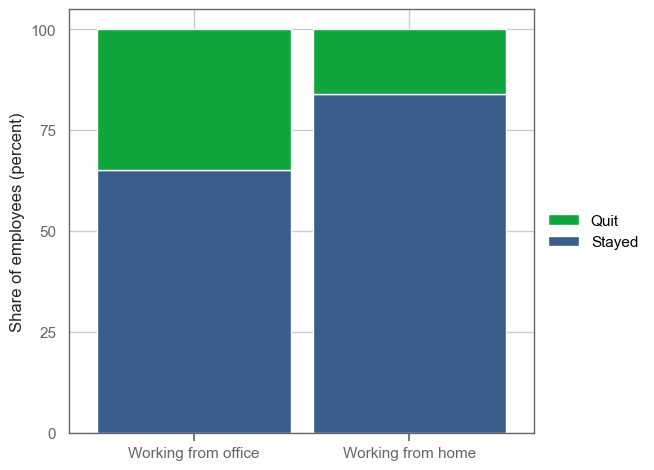

In [21]:
fig, ax = plt.subplots(figsize=(6, 5.5))
barchart_data.plot(kind="bar", x="treatment", stacked=True, ax=ax, width=0.9)
plt.xlabel("")
plt.ylabel("Share of employees (percent)")
ax.tick_params(axis="x", labelrotation=0)
ax.set_yticks(da.seq(0, 100, 25))

handles, _ = ax.get_legend_handles_labels()
plt.legend(
    handles=[handles[1], handles[0]],  # reverse order of legend to match book
    labels=["Quit", "Stayed"],
    bbox_to_anchor=(1, 0.55),
    frameon=False,
)

da.add_margin(ax, x=-0.05, y=0)

### Regression analysis 
 Outcome variables: 1) quit firm during 8 months of experiment , 2) phone calls worked, for ordertakers

In [22]:
# Outcomes by treatment

# 1) Quit firm
quitjobs

,mean,std,N
treatment,,,
0,0.347,0.478,118
1,0.160,0.368,131


In [23]:
# 2) Phonecalls (ordertakers only)
phonecalls1

,mean,std,N
treatment,,,
0,10.06,6.10,66
1,14.10,5.31,68


### Regression 1: ATE estimates, no covariates

In [24]:
reg1 = pf.feols("quitjob~treatment", data=data, vcov="HC1")
reg2 = pf.feols(
    "phonecalls1~treatment", data=data.loc[lambda x: x["ordertaker"] == 1], vcov="HC1"
)

In [25]:
pf.etable(
    [reg1, reg2],
    model_heads=["Quit job", "Phone calls (thousand)"],
    head_order="h",
    labels={"Intercept": "Constant", "treatment": "Treatment group"},
    show_se_type=False,
    digits=2,
)

GT(_tbl_data=  level_0             level_1                     0                     1
0    coef     Treatment group  -0.19*** <br> (0.05)   4.04*** <br> (0.99)
1    coef            Constant   0.35*** <br> (0.04)  10.06*** <br> (0.75)
2   stats        Observations                   249                   134
3   stats       R<sup>2</sup>                  0.05                  0.11
4   stats  Adj. R<sup>2</sup>                  0.04                  0.11, _body=<great_tables._gt_data.Body object at 0x15c048e30>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x15c35ce90>, _spanners=Spanners([SpannerInfo(spanner_id='Quit job', spanner_level=1, spanner_label='Quit job', spanner_units=None, spanner_pattern=None, vars=['0'], built=None), SpannerInfo(spanner_id='Phone calls (thousand)', spanner_level=1, spanner_label='Phone calls (thousand)', spanner_units=None, spanner_pattern=None, vars=['1'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x15c35c1d0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_

### Regression 2: ATE estimates, with covariates of some unbalance

In [26]:
reg3 = pf.feols(
    "quitjob ~ treatment + married + children + internet", data=data, vcov="HC1"
)
reg4 = pf.feols(
    "phonecalls1 ~ treatment + married + children",
    data=data.loc[lambda x: x["ordertaker"] == 1],
    vcov="HC1",
)

In [27]:
pf.etable(
    [reg3, reg4],
    model_heads=["Quit job", "Phone calls (thousand)"],
    head_order="h",
    labels={
        "Intercept": "Constant",
        "treatment": "Treatment group",
        "married": "Married",
        "children": "Children",
        "internet": "Internet at home",
    },
    show_se_type=False,
    digits=2,
)

GT(_tbl_data=  level_0             level_1                    0                     1
0    coef     Treatment group  -0.19** <br> (0.06)   4.06*** <br> (0.96)
1    coef             Married    -0.13 <br> (0.07)    -5.44* <br> (2.17)
2    coef            Children     0.11 <br> (0.10)      3.87 <br> (2.41)
3    coef    Internet at home  0.18*** <br> (0.04)                      
4    coef            Constant   0.19** <br> (0.06)  10.65*** <br> (0.76)
5   stats        Observations                  249                   134
6   stats       R<sup>2</sup>                 0.05                  0.17
7   stats  Adj. R<sup>2</sup>                 0.04                  0.15, _body=<great_tables._gt_data.Body object at 0x15c383d10>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x15c382b40>, _spanners=Spanners([SpannerInfo(spanner_id='Quit job', spanner_level=1, spanner_label='Quit job', spanner_units=None, spanner_pattern=None, vars=['0'], built=None), SpannerInfo(spanner_id='Phone calls (thousand)', spanner_level=1, spanner_label='Phone calls (thousand)', spanner_units=None, spanner_pattern=None, vars=['1'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x15c3839e0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#